#### STEP 1: Required Libraries Install

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.9 MB/s eta 0:00:39
   ---------------------------------------- 0.8/72.0 MB 1.5 MB/s eta 0:00:49
    --------------------------------------- 1.6/72.0 MB 2.3 MB/s eta 0:00:32
    --------------------------------------- 1.6/72.0 MB 2.3 MB/s eta 0:00:32
   - -------------------------------------- 2.1/72.0 MB 1.8 MB/s eta 0:00:39
   - -------------------------------------- 2.1/72.0 MB 1.8 MB/s eta 0:00:39
   -- ------------------------------------- 3.9/72.0 MB 2.6 MB/s eta 0:00:27
   -- ------------------------------------- 4.5/72.0 MB 2.6 MB/s eta 0:00:27
   -- ------------------------------------- 5.0/72.0 MB 2.5 MB/s eta 0:00:27
   -- ------------------------------------- 5.2/72.0 MB 2.6 MB/s eta 0:00:26
   --- -------------

#### STEP 2: Libraries Import

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [14]:
import os

# Current notebook directory
save_path = os.getcwd()
print("Figures will be saved in:", save_path)

Figures will be saved in: C:\Users\hp\Machine learning internship\Task_1_Per_Prediction


#### STEP 3: Sample Dataset Create

In [3]:
data = {
    "task_completion_time": np.random.randint(1, 10, 50),   # days
    "feedback_rating": np.random.randint(1, 6, 50),         # 1 to 5
    "attendance_percentage": np.random.randint(60, 100, 50),
    "performance_score": np.random.randint(50, 100, 50)    # target
}

df = pd.DataFrame(data)
df.head()

,task_completion_time,feedback_rating,attendance_percentage,performance_score
0,7,2,68,57
1,7,5,92,64
2,5,2,96,72
3,2,1,74,99
4,5,1,81,93


#### STEP 4: Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   task_completion_time   50 non-null     int32
 1   feedback_rating        50 non-null     int32
 2   attendance_percentage  50 non-null     int32
 3   performance_score      50 non-null     int32
dtypes: int32(4)
memory usage: 932.0 bytes


In [5]:
df.describe()

,task_completion_time,feedback_rating,attendance_percentage,performance_score
count,50.000000,50.000000,50.000000,50.000000
mean,4.720000,2.820000,82.100000,77.480000
std,2.672918,1.586808,11.622023,14.525474
min,1.000000,1.000000,60.000000,51.000000
25%,3.000000,1.000000,74.000000,65.000000
50%,4.000000,2.000000,81.500000,80.000000
75%,7.000000,4.000000,92.000000,91.750000
max,9.000000,5.000000,99.000000,99.000000


#### STEP 5: Data Visualization

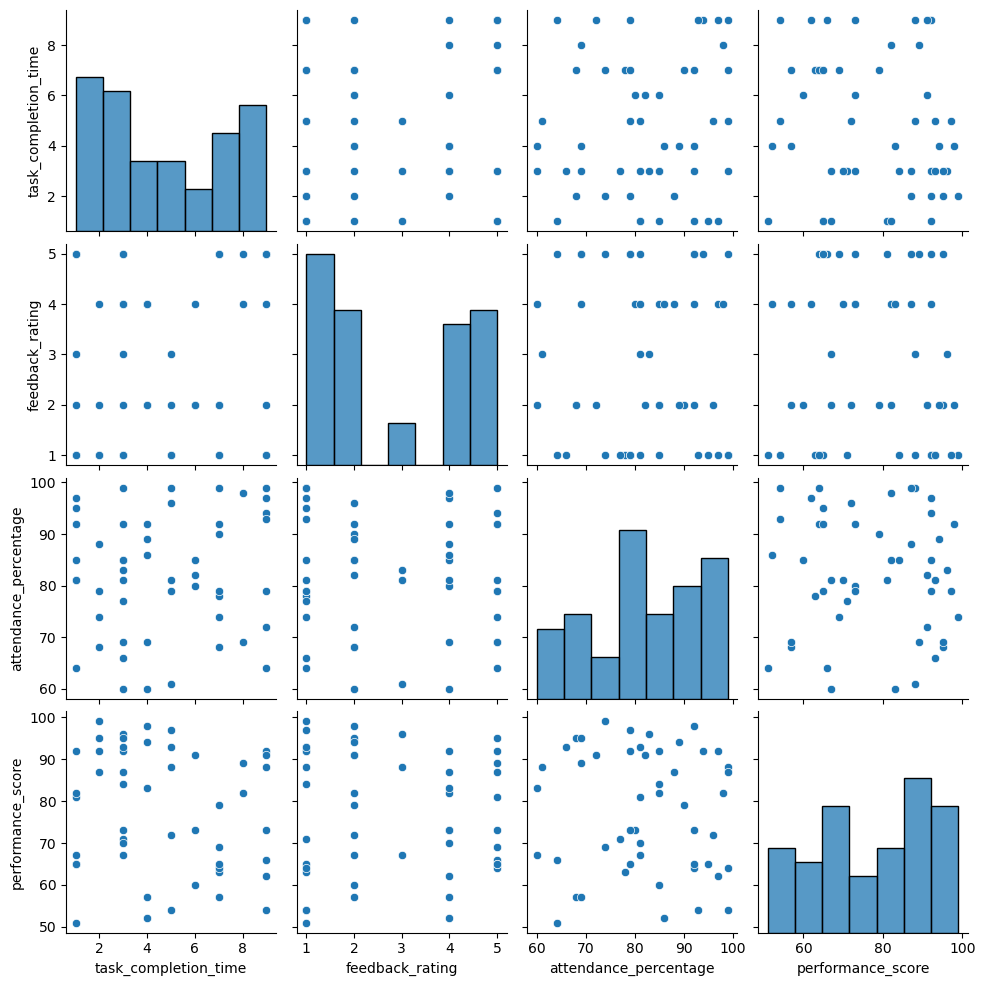

In [15]:
sns.pairplot(df)
plt.savefig("pairplot.png", dpi=300)
plt.show()

#### STEP 6: Features & Target Split

In [7]:
X = df.drop("performance_score", axis=1)
y = df["performance_score"]

#### STEP 7: Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### STEP 8: Random Forest Regression Model

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

#### STEP 9: Prediction & Evaluation (Random Forest)

In [10]:
rf_predictions = rf_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R2 Score:", r2_score(y_test, rf_predictions))

MAE: 11.198999999999998
MSE: 169.24332999999996
R2 Score: -0.3794386665579912


#### Actual vs Predicted Plot

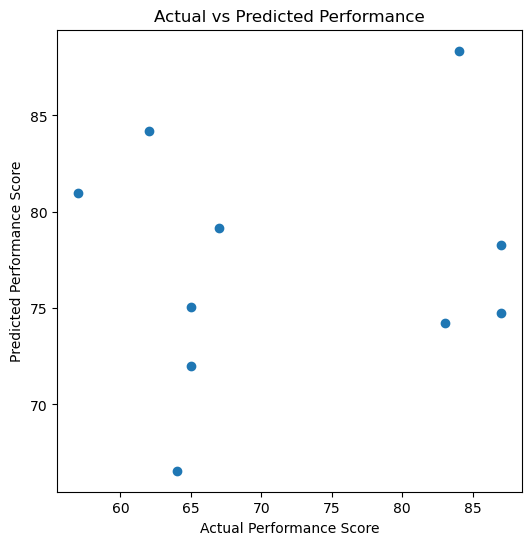

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_predictions)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance")
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()

#### STEP 10: XGBoost Regression Model

In [11]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

#### STEP 11: Prediction & Evaluation (XGBoost)

In [12]:
xgb_predictions = xgb_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R2 Score:", r2_score(y_test, xgb_predictions))

MAE: 14.280182647705079
MSE: 278.98348419964896
R2 Score: -1.2738893032073975


#### STEP 12: Intern Performance Classification (Excel / Struggle)

In [13]:
def performance_label(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Average"
    else:
        return "Struggling"

df["performance_label"] = df["performance_score"].apply(performance_label)
df.head()

,task_completion_time,feedback_rating,attendance_percentage,performance_score,performance_label
0,7,2,68,57,Struggling
1,7,5,92,64,Average
2,5,2,96,72,Average
3,2,1,74,99,Excellent
4,5,1,81,93,Excellent


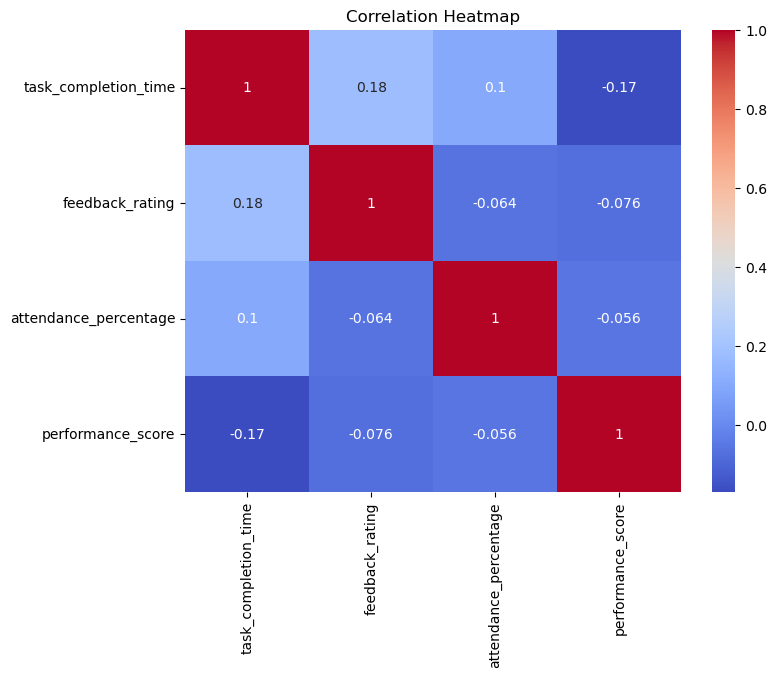

In [18]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

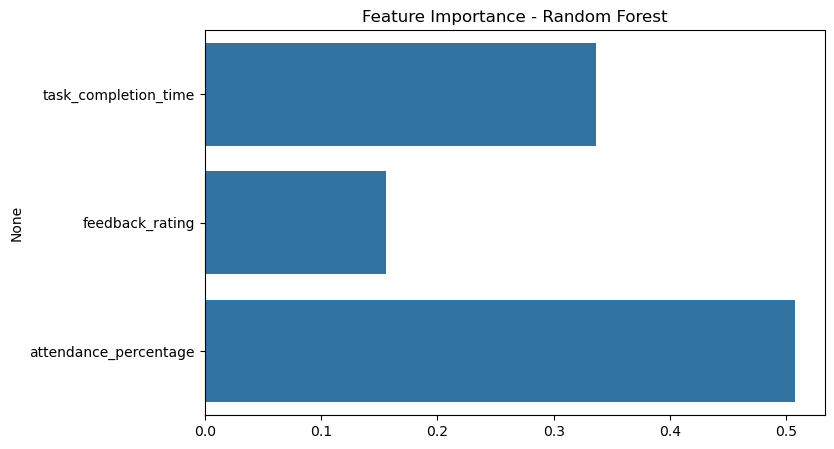

In [21]:
features = X.columns
importances = rf_model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()